# Case 2: Compare structures using `ImplicitHBDonor` and `ImplicitHBAcceptor`


In [32]:
from prolif.io.cif import cif_template_reader
from prolif.io.protein_helper import ProteinHelper

protein_helper = ProteinHelper(
    [
        {"ZN": {"SMILES": "[Zn++]"}},
        cif_template_reader("./test_data/templates/A.cif"),
        cif_template_reader("./test_data/templates/U.cif"),
        cif_template_reader("./test_data/templates/C.cif"),
        cif_template_reader("./test_data/templates/G.cif"),
    ]
)

## Experimental structure

In [33]:
import MDAnalysis as mda

u = mda.Universe("./test_data/8aw3.pdb")
u.select_atoms("protein or water").write("./test_data/8aw3_protein.pdb")
u.select_atoms("not protein and not water").write("./test_data/8aw3_ligand.pdb")

/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [34]:
protein_mol = protein_helper.standardize_protein("./test_data/8aw3_protein.pdb")

/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/prolif/io/protein_helper.py:161: UserWarning: Could not guess the forcefield based on the residue names. CYS is assigned to neutral CYS (charge = 0).
  standardized_resname = self.convert_to_standard_resname(
/tmp/ipykernel_2342266/3138374702.py:1: UserWarning: Residue ARG217.2 has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  protein_mol = protein_helper.standardize_protein("./test_data/8aw3_protein.pdb")
/tmp/ipykernel_2342266/3138374702.py:1: UserWarning: Residue ARG219.2 has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  protein_mol = protein_helper.standardize_protein("./test_data/8aw3_protein.pdb")
/tmp/ipykernel_2342266/3138374702.py:1: UserWarning: Residue ASP221.2 has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  protein_mol = protein_helper.standar

In [35]:
protein_mol.residues.__len__()

456

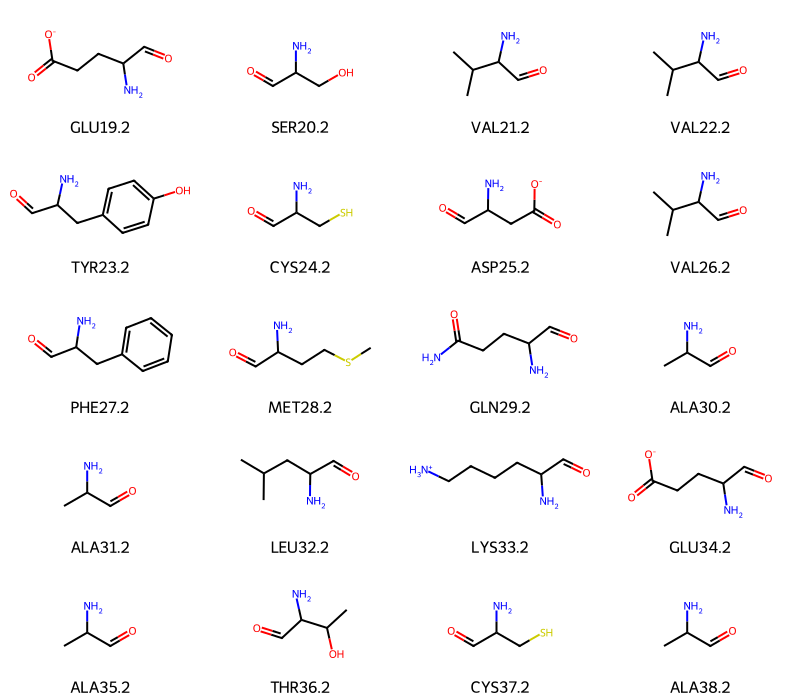

In [36]:
import prolif as plf

plf.display_residues(protein_mol, slice(0, 20), sanitize=False)

In [37]:
ligand = protein_helper.standardize_protein("./test_data/8aw3_ligand.pdb")

/tmp/ipykernel_2342266/2173832818.py:1: UserWarning: Residue G2.1 has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  ligand = protein_helper.standardize_protein("./test_data/8aw3_ligand.pdb")
/tmp/ipykernel_2342266/2173832818.py:1: UserWarning: Residue C3.1 has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  ligand = protein_helper.standardize_protein("./test_data/8aw3_ligand.pdb")
/tmp/ipykernel_2342266/2173832818.py:1: UserWarning: Residue C4.1 has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  ligand = protein_helper.standardize_protein("./test_data/8aw3_ligand.pdb")
/tmp/ipykernel_2342266/2173832818.py:1: UserWarning: Residue G5.1 has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  ligand = protein_helper.standardize_protein("./test_data/8aw3_ligand.pdb")
/tmp/ipykernel_2342266/217383281

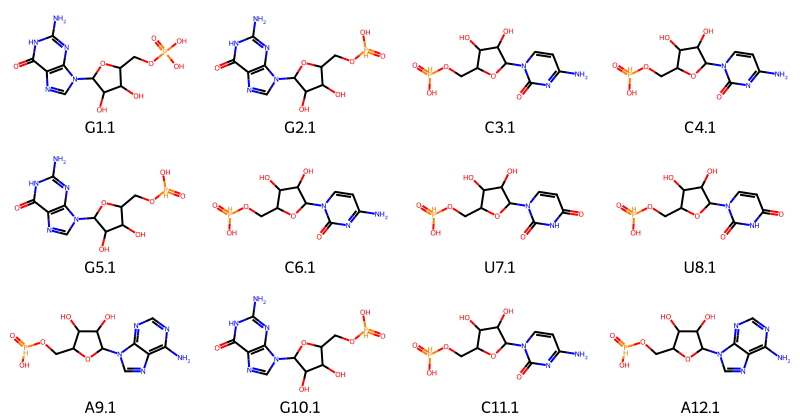

In [38]:
plf.display_residues(ligand, slice(0, 12), sanitize=False)

In [39]:
fp = plf.Fingerprint(["ImplicitHBDonor", "ImplicitHBAcceptor"], count=True)
fp.run_from_iterable([ligand], protein_mol, progress=False)
df = fp.to_dataframe().T

In [40]:
df

Frame                               0
ligand protein  interaction          
C30.1  LYS218.2 ImplicitHBAcceptor  1
C32.1  ARG159.2 ImplicitHBAcceptor  1
U33.1  CYS155.2 ImplicitHBAcceptor  1
       ASN157.2 ImplicitHBDonor     2
                ImplicitHBAcceptor  1
       GLN202.2 ImplicitHBAcceptor  1
C34.1  GLU134.2 ImplicitHBDonor     1
       ASN157.2 ImplicitHBDonor     1
                ImplicitHBAcceptor  1
       TYR205.2 ImplicitHBAcceptor  1
G35.1  ARG207.2 ImplicitHBDonor     1
U36.1  ARG302.3 ImplicitHBAcceptor  1
A37.1  ASN211.2 ImplicitHBDonor     1

In [41]:
view = fp.plot_3d(ligand, protein_mol, frame=0, display_all=True)
view.setStyle(
    {
        "resn": "HOH",
    },
    {"sphere": {"radius": 0.5, "color": "red"}},
)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Computational structure

In [42]:
import gemmi

structure = gemmi.read_structure("./test_data/examplefold_pdb_8aw3_model_0.cif")
structure.write_pdb("./test_data/examplefold_pdb_8aw3_model_0.pdb")

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import align

u_comp = mda.Universe("./test_data/examplefold_pdb_8aw3_model_0.pdb")
# align the structure to the reference using MDAnalysis
# (not affect the calculation of fingerprint)
align.alignto(u_comp, u, select="backbone and name CA and resid 183-221")

u_comp.select_atoms("protein or water").write(
    "./test_data/examplefold_pdb_8aw3_model_0_protein.pdb"
)
u_comp.select_atoms("not protein and not water").write(
    "./test_data/examplefold_pdb_8aw3_model_0_ligand.pdb"
)

In [60]:
protein_mol_comp = protein_helper.standardize_protein(
    "./test_data/examplefold_pdb_8aw3_model_0_protein.pdb"
)
ligand_comp = protein_helper.standardize_protein(
    "./test_data/examplefold_pdb_8aw3_model_0_ligand.pdb"
)

/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/prolif/io/protein_helper.py:161: UserWarning: Could not guess the forcefield based on the residue names. CYS is assigned to neutral CYS (charge = 0).
  standardized_resname = self.convert_to_standard_resname(
/tmp/ipykernel_2342266/4063688772.py:4: UserWarning: Residue G2.E has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  ligand_comp = protein_helper.standardize_protein(
/tmp/ipykernel_2342266/4063688772.py:4: UserWarning: Residue C3.E has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  ligand_comp = protein_helper.standardize_protein(
/tmp/ipykernel_2342266/4063688772.py:4: UserWarning: Residue C4.E has a different number of heavy atoms than the standard residue. This may affect H-bond detection.
  ligand_comp = protein_helper.standardize_protein(
/tmp/ipykernel_2342266/4063688772.py:4: UserWarning: Residue

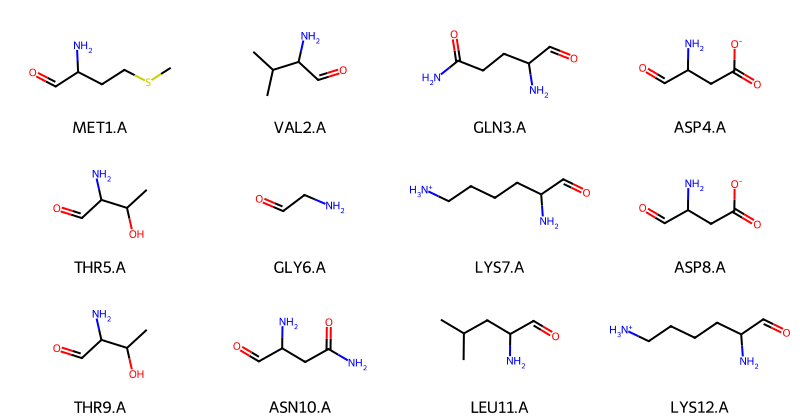

In [61]:
plf.display_residues(protein_mol_comp, slice(0, 12), sanitize=False)

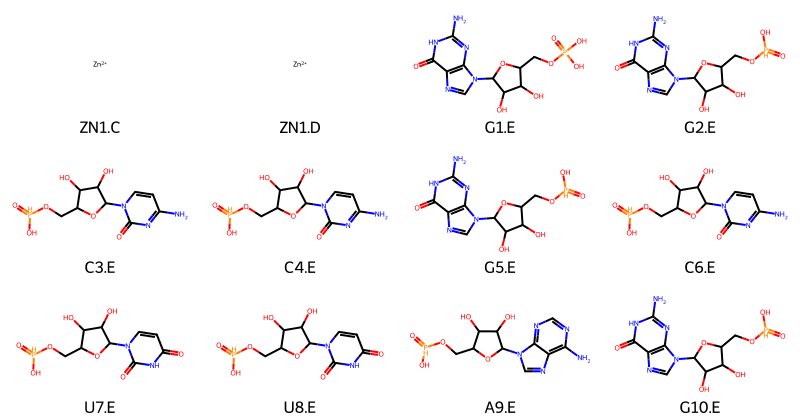

In [62]:
plf.display_residues(ligand_comp, slice(0, 12), sanitize=False)

In [63]:
fp_comp = plf.Fingerprint(["ImplicitHBDonor", "ImplicitHBAcceptor"], count=True)
fp_comp.run_from_iterable([ligand_comp], protein_mol_comp, progress=False)
df_comp = fp_comp.to_dataframe().T

In [64]:
df_comp

Frame                               0
ligand protein  interaction          
U32.E  TYR205.A ImplicitHBDonor     1
G34.E  ASN82.A  ImplicitHBAcceptor  1
       GLU208.A ImplicitHBDonor     1
       ASN209.A ImplicitHBDonor     2
A37.E  LYS216.A ImplicitHBAcceptor  1
       ASN335.B ImplicitHBDonor     1
       HIS336.B ImplicitHBAcceptor  1

In [67]:
view_comp = fp_comp.plot_3d(ligand_comp, protein_mol_comp, frame=0, display_all=True)
view_comp.setStyle(
    {
        "resn": "HOH",
    },
    {"sphere": {"radius": 0.5, "color": "red"}},
)
view_comp

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Comparison

In [70]:
# create Complex3D objects
comp3D = fp.plot_3d(ligand, protein_mol, frame=0)
other_comp3D = fp_comp.plot_3d(ligand_comp, protein_mol_comp, frame=0)

# compare the two Complex3D objects
view = comp3D.compare(other_comp3D, display_all=True, remove_hydrogens=False)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.